# Shocktube Test

In [1]:
# import
import plot_tools as pt

# more setup
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Interpolate and Diff

### Exact Solution

In [2]:
exact = pt.load_data("../data/shocktube/exact_solutions/Balsara1/solution_last.dat")
# interp func of exact solution
rho_exact = pt.interp1d_data(exact, cols=[1,2])
bvecy_exact = pt.interp1d_data(exact, cols=[1,7])

loading ../data/shocktube/exact_solutions/Balsara1/solution_last.dat cols: all


### Numerical Solution

In [3]:
dirs = [
    "n200",
    "n400",
    "n800",
    "n1600"
]
for i in range(len(dirs)):
    dirs[i] = "../data/shocktube/Balsara1/" + dirs[i]

rho = pt.DataSet(dirs, r"hydrobase-rho*", cols=[8,11])
bvecy = pt.DataSet(dirs, r"hydrobase-bvec*", cols=[8,12])

loading ../data/shocktube/Balsara1/n200/hydrobase-rho.it000320.x.tsv cols: [8, 11]
loading ../data/shocktube/Balsara1/n400/hydrobase-rho.it000640.x.tsv cols: [8, 11]
loading ../data/shocktube/Balsara1/n800/hydrobase-rho.it001280.x.tsv cols: [8, 11]
loading ../data/shocktube/Balsara1/n1600/hydrobase-rho.it002560.x.tsv cols: [8, 11]
loading ../data/shocktube/Balsara1/n200/hydrobase-bvec.it000320.x.tsv cols: [8, 12]
loading ../data/shocktube/Balsara1/n400/hydrobase-bvec.it000640.x.tsv cols: [8, 12]
loading ../data/shocktube/Balsara1/n800/hydrobase-bvec.it001280.x.tsv cols: [8, 12]
loading ../data/shocktube/Balsara1/n1600/hydrobase-bvec.it002560.x.tsv cols: [8, 12]


In [4]:
# calc all: interpolate, diff, integrate, convergence order
rho.calcall(rho_exact, num=3200)
bvecy.calcall(bvecy_exact, num=3200)

### Convergence Order

In [14]:
rho.getConvorderset()

[0.7543302415815657, 0.7544668526728422, 0.7446037488152952]

In [15]:
bvecy.getConvorderset()

[0.6581669543457903, 0.6632980409349492, 0.6725365689247707]

## Plot

### $\rho$

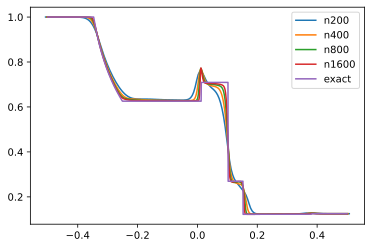

In [5]:
%matplotlib inline
rho.plotData(f_exact=rho_exact, num=3200)

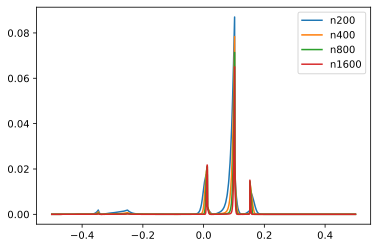

In [6]:
rho.plotDiff()

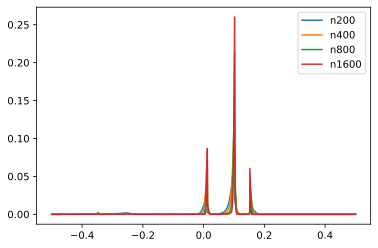

In [7]:
rho.plotConv(conv_order=1)

### $B_y$

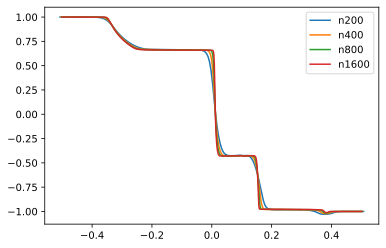

In [8]:
bvecy.plotData()

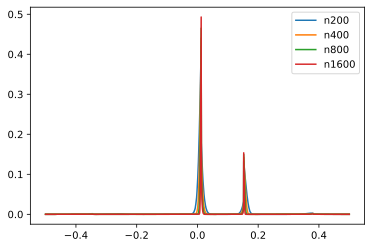

In [9]:
bvecy.plotDiff()

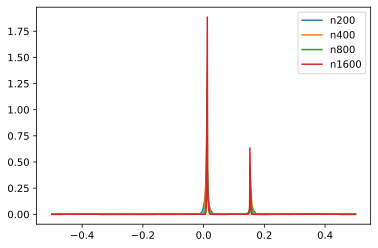

In [15]:
bvecy.plotConv(conv_order=1)